In [38]:
import base64
import struct
import matplotlib.pyplot as plt
import pandas as pd
f = open("hrmlog_text.txt")
lines = f.readlines()
hrmraw = lines[2]

data = base64.b64decode(hrmraw.split(":")[1])
data = list(struct.iter_unpack(">Ihhhh",data))
df = pd.DataFrame(data,columns=["time","ppg","x","y","z"])

<Axes: >

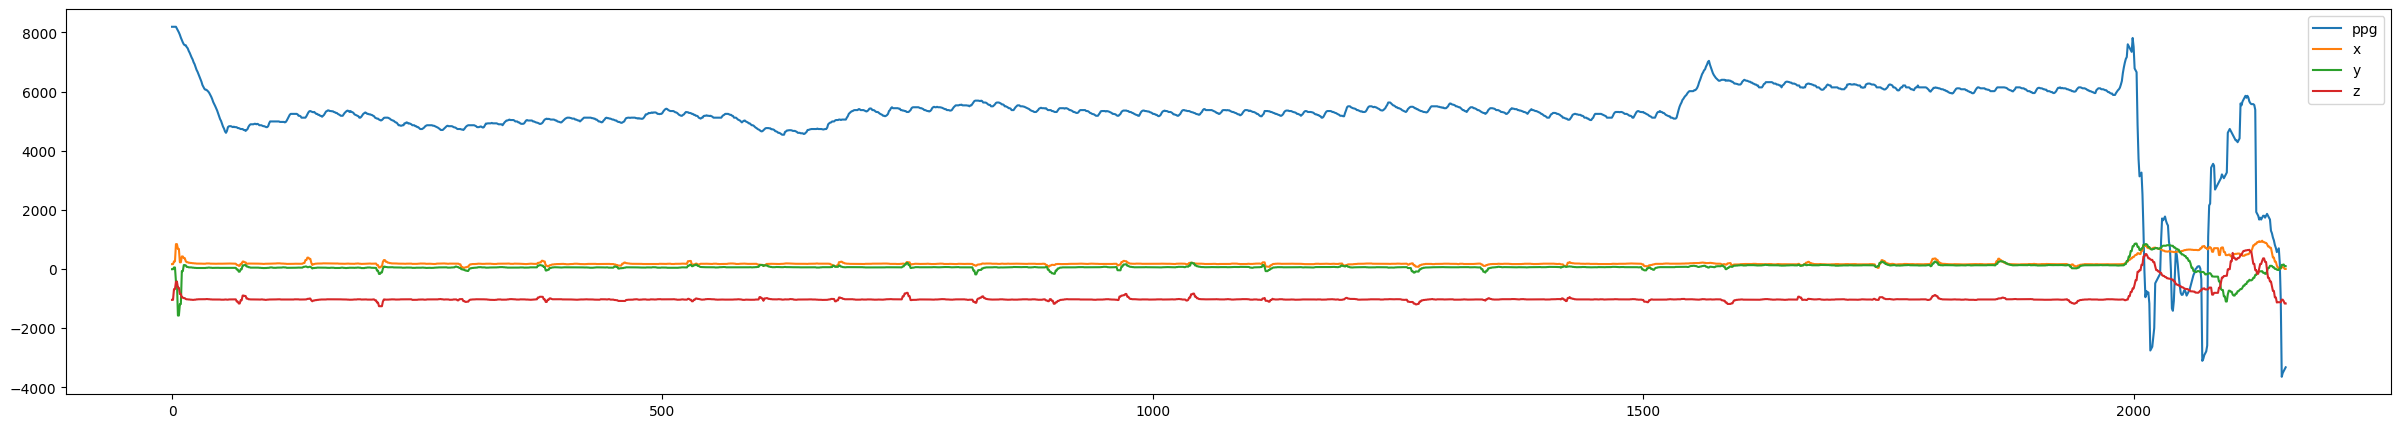

In [39]:
df[["ppg","x","y","z"]].plot(figsize=(30,5))

(1693311150,)

In [146]:
#simple grab

import sqlite3
import pandas as pd
import struct
import binascii;
import datetime
with sqlite3.connect("app.db") as con:
    res = con.execute("select uuid, hex(data) from data_sync where complete=1 order by dt desc")
    all_data = res.fetchall()
    for t in all_data[0:5]:
        print(t)
    




('24fd6648e46d49ab9ca4a4a5f852e367', '6865616C74686C6F6732333A64F526A0000000C464F526AC000000C40A68726D6C6F6732333A')
('8e625c5360b34ed9873a462bd7572928', '6865616C74686C6F6732333A64F52661000000CB64F52670000000CC0A68726D6C6F6732333A')
('4ddb6e5188ac43cab59dbc612ed030a5', '6865616C74686C6F6732333A64F52623000000DD64F52634000000E80A68726D6C6F6732333A')
('af3d3de487c041f0949ca48a0eefe7db', '6865616C74686C6F6732333A64F525E2000000B064F525F8000000B00A68726D6C6F6732333A64F525FC590064F525FC700064F525FD6B0064F525FE690064F525FE650064F5250BFE610064F526005D0064F5260B0C5D0064F5260B0C5D0064F5260B0D5D0064F5260B0D5D0064F5260B0D5D0064F52603640064F52604640064F526046E0064F52604740064F526057E0064F526057A0064F52606790064F52607780064F52608780064F52608780064F52609790064F526097F0064F5260B0F7A0064F5260B0F7A0064F5260B0F7A0064F5260B0B790064F5260B0B760064F5260C760064F5260D6F0864F5260E690064F5260F630964F52610660064F52610660064F52611640064F52612620064F52613610064F52614630064F52614600064F526155C0F64F52616560064F526175

config36 2 b'{}'
healthlog36 19 [(1693866822, 0, 256, 0), (1693866840, 0, 244, 0), (1693866900, 0, 227, 0), (1693866960, 0, 200, 0), (1693867020, 0, 205, 0), (1693867080, 0, 200, 0), (1693867140, 0, 186, 0), (1693867200, 0, 60, 0), (1693867260, 8, 272, 0), (1693867320, 0, 234, 0), (1693867380, 0, 243, 0), (1693867440, 0, 239, 0), (1693867500, 0, 238, 0), (1693867560, 0, 239, 0), (1693867620, 0, 239, 0), (1693867680, 0, 227, 0), (1693867740, 0, 225, 0), (1693867800, 0, 30, 0), (1693867860, 0, 146, 0)]
accellog36 18 [(1693866822, 66, 1, 66, 0), (1693866883, 14359, 733, 7848, 0), (1693866944, 6641, 742, 3422, 0), (1693867005, 20202, 741, 9037, 0), (1693867066, 15641, 742, 8022, 0), (1693867127, 7218, 743, 3930, 0), (1693867188, 4271, 742, 2074, 0), (1693867249, 10792, 743, 5433, 0), (1693867310, 26378, 743, 14075, 0), (1693867371, 22546, 681, 13551, 0), (1693867432, 16982, 581, 9426, 0), (1693867493, 18929, 631, 10497, 0), (1693867554, 23910, 741, 11020, 0), (1693867615, 21800, 744, 9595,

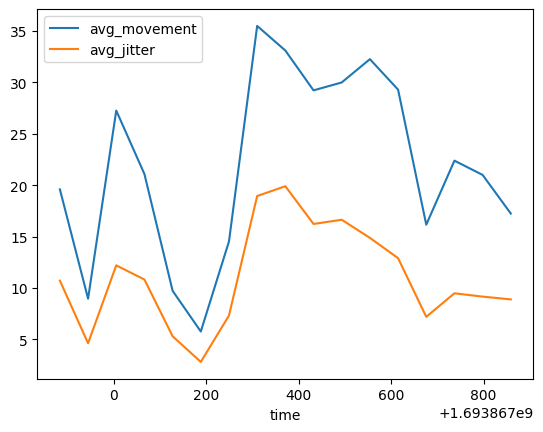

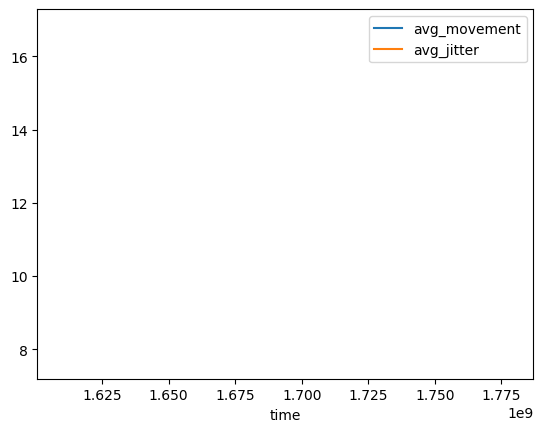

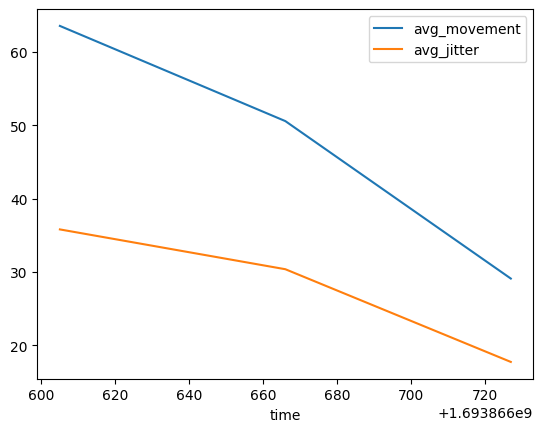

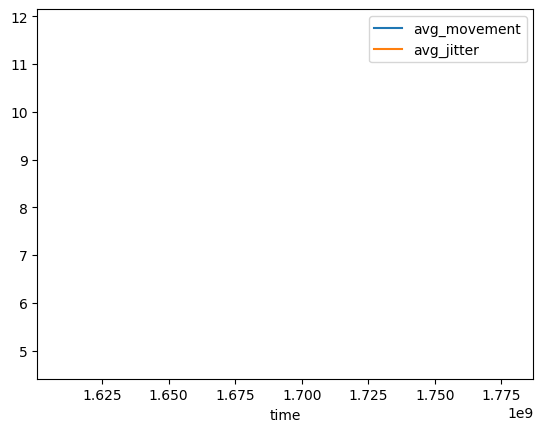

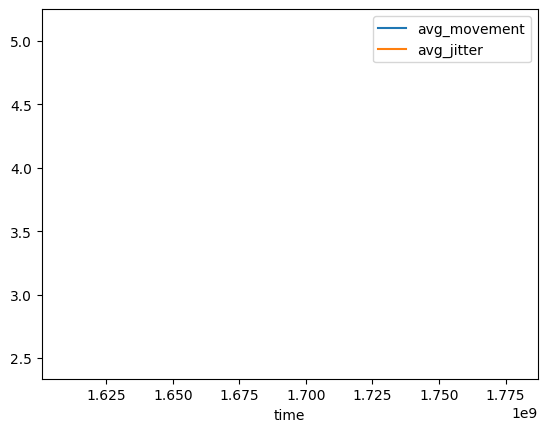

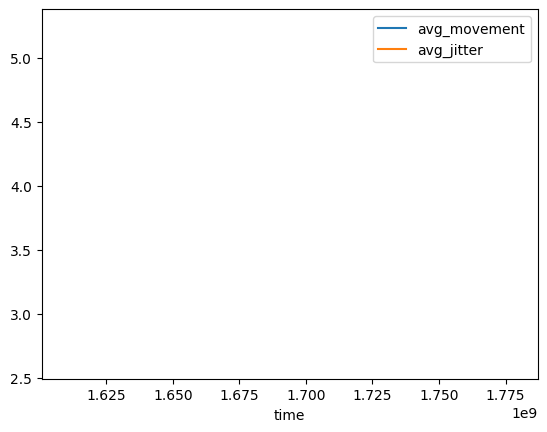

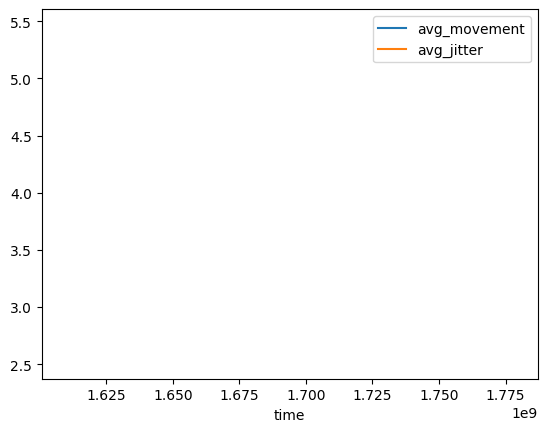

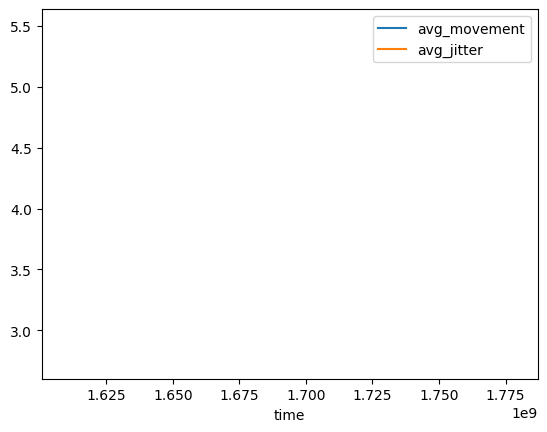

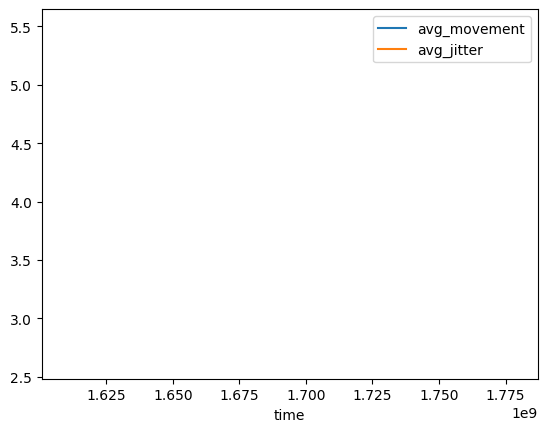

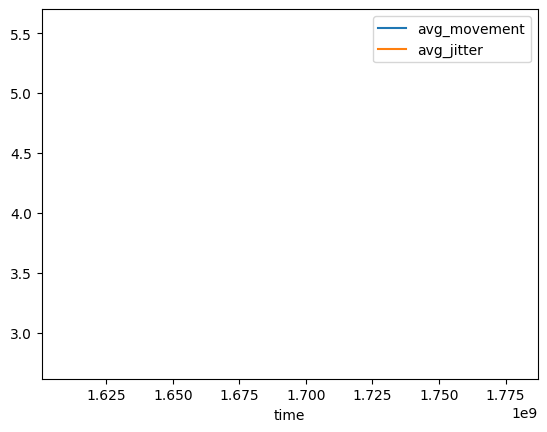

In [2]:
# check data

import sqlite3
import pandas as pd
import struct
import binascii;
import datetime
import base64
with sqlite3.connect("app.db") as con:
    res = con.execute("select uuid, hex(data) from data_sync where complete=1 order by dt desc")
    all_data = res.fetchall()
    for t in all_data[0:10]:
        files = bytearray.fromhex(t[1]).decode().split("\n")
        for f in files:
            parts = f.split(":")
            filename = parts[0]
            data = base64.b64decode(parts[1])
            if "hrmraw36" in filename:
                data = list(struct.iter_unpack(">HB",data))
                df_raw = pd.DataFrame(data,columns=["value","time_delta"]) 
            elif "hrmreg36" in filename:
                data = list(struct.iter_unpack(">IBB",data))
                df_reg = pd.DataFrame(data,columns=["time","bpm","conf"])
            elif "healthlog36" in filename:
                data = list(struct.iter_unpack(">IHHB",data))
            elif "accellog36" in filename:
                data = list(struct.iter_unpack(">IIIIH",data))
                df_acc = pd.DataFrame(data,columns=["time","movement","samples","jitter","padding"])
                df_acc["avg_movement"] = df_acc.movement/df_acc.samples
                df_acc["avg_jitter"] = df_acc.jitter/df_acc.samples
                df_acc[df_acc.samples > 5].plot(x="time",y=["avg_movement","avg_jitter"])
            print(filename, len(data), data)
            
        print()

        

here


,timestamp,steps,movement,notused
0,1693860518,0,602,0
1,1693860534,0,588,0
2,1693860540,0,583,0
3,1693860600,7,836,0
4,1693860660,8,965,0
5,1693860720,23,871,0
6,1693860780,0,619,0
7,1693860840,0,515,0
8,1693860900,0,449,0
9,1693860960,0,388,0


<Axes: xlabel='date'>

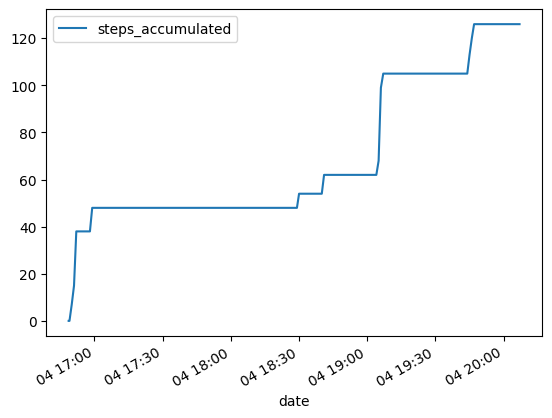

In [63]:
# let's extract all of the data and grab a clean table of steps taken

import sqlite3
import pandas as pd
import struct
import binascii;
import datetime
import base64
full_data = []
print("here")
with sqlite3.connect("app.db") as con:
    res = con.execute("select uuid, hex(data) from data_sync where complete=1 order by dt asc")
    all_data = res.fetchall()
    
    for t in all_data:

        files = bytearray.fromhex(t[1]).decode().split("\n")
        for f in files:
            parts = f.split(":")
            filename = parts[0]
            data = base64.b64decode(parts[1])
            if "healthlog" in filename:
                data = list(struct.iter_unpack(">IHHB",data))
                full_data.extend(data)
            
df = pd.DataFrame(full_data,columns=["timestamp", "steps", "movement", "notused"])
display(df.head(20))
df["movement_accumulated"] = df.movement.cumsum()

df["date"] = df.timestamp.apply(datetime.datetime.fromtimestamp)
df["steps_accumulated"] = df.steps.cumsum()
df.plot(x="date",y="steps_accumulated")

        


In [106]:
import pandas as pd
import sqlite3
import datetime
import base64
import struct
target_day = "9/5/2023"
dt = datetime.datetime.strptime(target_day, "%m/%d/%Y")

with sqlite3.connect("app.db") as con:
    df = pd.read_sql("select from_time,dt,hex(data) as data_hex from data_sync",con)
    df["data"] = df.data_hex.apply(bytearray.fromhex).apply(bytearray.decode)
    df["stepdata_encoded"] = df["data"].str.extract("healthlog[0-9]*:(.*)\n")
    df["stepdata"] = df.stepdata_encoded.apply(base64.b64decode)
    df["stepdata_unpacked"] = df.stepdata.apply(lambda x: list(struct.iter_unpack(">IHHB",x)))
    df = df.explode("stepdata_unpacked")
    df['step_data_movement'] = df.stepdata_unpacked.apply(lambda x: x[2]) - 60
    df['step_data_steps'] = df.stepdata_unpacked.apply(lambda x: x[1])
    df['step_data_timestamp'] = df.stepdata_unpacked.apply(lambda x: x[0])
    df['dt'] = df.step_data_timestamp.apply(datetime.datetime.fromtimestamp)
    df['date'] = df.dt.dt.date
    df['hour'] = df.dt.dt.hour
    df['minute'] = df.dt.dt.minute
    df = df[["dt", "date","hour","minute","step_data_steps","step_data_movement"]]
    #df = df[["dt","from_time","stepdata"]]
#df.to_excel('test.xlsx')

df[(df.date == datetime.date(2023,9,6)) & (df.hour >= 0) & (df.hour <= 24) & (df.step_data_movement < 400)].plot(x="dt",y="step_data_movement",figsize=(20,5))

SyntaxError: '[' was never closed (2528674794.py, line 26)

In [8]:
#this example shows how to use the bangle api to get syncs and turn them into something useful using pandas
import pandas as pd
import requests
import datetime
import base64
import struct
import json
import math
import matplotlib.pyplot as plt
from_time = math.floor((datetime.datetime.now()-datetime.timedelta(days=1)).timestamp())
dt = datetime.datetime.strptime(target_day, "%m/%d/%Y")
res = requests.get(f"https://bbs.ugavel.com/getsyncs?device_id=e5:cc:1d:bb:e4:d1&from_time={from_time}")
df = pd.DataFrame.from_records(res.json()["syncs"])

df["stepdata_encoded"] = df["data"].str.extract("healthlog[0-9]*:(.*)\n")
df["stepdata"] = df.stepdata_encoded.apply(base64.b64decode)
df["stepdata_unpacked"] = df.stepdata.apply(lambda x: list(struct.iter_unpack(">IHHB",x)))
df = df.explode("stepdata_unpacked")
df['step_data_movement'] = df.stepdata_unpacked.apply(lambda x: x[2]) - 60
df['step_data_steps'] = df.stepdata_unpacked.apply(lambda x: x[1])
df['step_data_timestamp'] = df.stepdata_unpacked.apply(lambda x: x[0])
df['dt'] = df.step_data_timestamp.apply(datetime.datetime.fromtimestamp)
df['date'] = df.dt.dt.date
df['hour'] = df.dt.dt.hour
df['minute'] = df.dt.dt.minute
df = df[["dt", "date","hour","minute","step_data_steps","step_data_movement"]]
fig,ax = plt.subplots(figsize=(20,5))
#df[(df.date == datetime.date(2023,9,6))].plot(x="dt",y="step_data_steps",figsize=(20,5), ax = ax)
df[(df.date == datetime.date(2023,9,6)) & (df.hour >= 0) & (df.hour <= 24) & (df.step_data_movement < 400)].plot(x="dt",y="step_data_movement",secondary_y=True, ax = ax)

NameError: name 'target_day' is not defined

<Axes: xlabel='dt'>

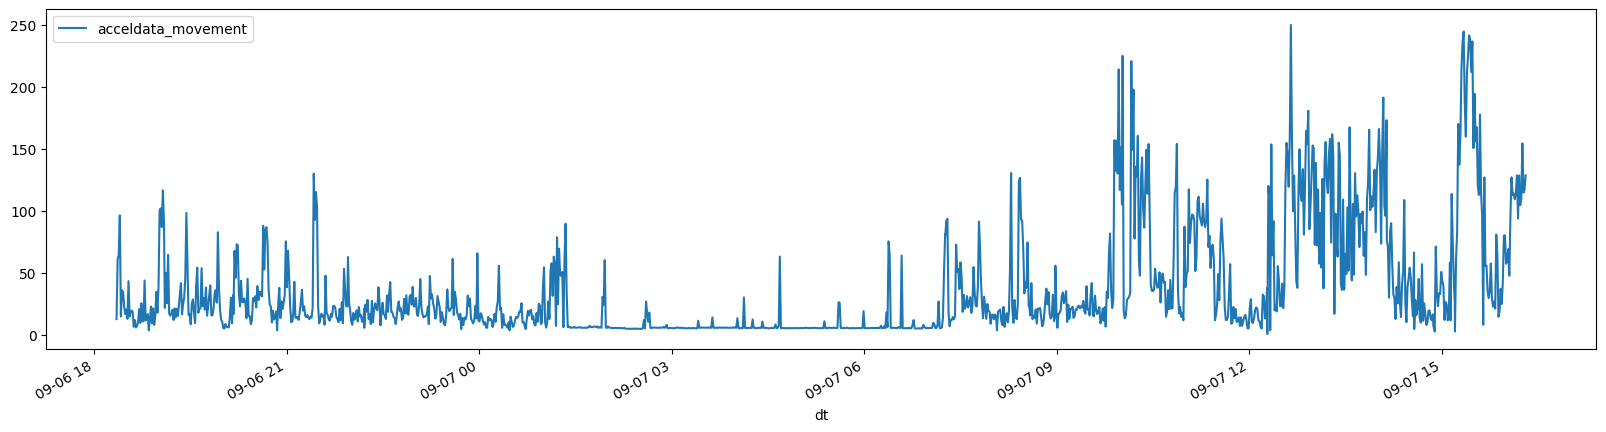

In [7]:
#this example shows how to use the bangle api to get syncs and turn them into something useful using pandas
import pandas as pd
import requests
import datetime
import base64
import struct
import json
import math
import matplotlib.pyplot as plt
from_time = math.floor((datetime.datetime.now()-datetime.timedelta(days=1)).timestamp())
res = requests.get(f"https://bbs.ugavel.com/getsyncs?device_id=e5:cc:1d:bb:e4:d1&from_time={from_time}")
df = pd.DataFrame.from_records(res.json()["syncs"])

df["acceldata_encoded"] = df["data"].str.extract("accellog[0-9]*:(.*)\n?")
df["acceldata"] = df.acceldata_encoded.apply(base64.b64decode)
df["acceldata_unpacked"] = df.acceldata.apply(lambda x: list(struct.iter_unpack(">IIIIH",x)))
df = df.explode("acceldata_unpacked")
df['acceldata_movement'] = df.acceldata_unpacked.apply(lambda x: x[1]/x[2])
df['accel_data_timestamp'] = df.acceldata_unpacked.apply(lambda x: x[0])
df['dt'] = df.accel_data_timestamp.apply(datetime.datetime.fromtimestamp)
df['date'] = df.dt.dt.date
df['hour'] = df.dt.dt.hour
df['minute'] = df.dt.dt.minute
df = df[["dt", "date","hour","minute","acceldata_movement"]]
fig,ax = plt.subplots(figsize=(20,5))
df.plot(x="dt",y="acceldata_movement",figsize=(20,5), ax = ax)


In [43]:
import pandas as pd
import requests
import struct
import base64
from datetime import datetime
from datetime import date
app_name="test_app"
res = requests.get("https://bbs.ugavel.com/getsyncs",params={"device_id":"e5:cc:1d:bb:e4:d1","from_time":0,"app_name":"test_app"})
df = pd.DataFrame.from_records(res.json()["syncs"])
if len(df)==0:
    print("no data, do nothing")
else:
        goals_encoded = df["data"].str.extract(f"goals{app_name}[0-9]*:(.*)")
        goals_encoded.columns = ["encoded_goals"]
        goals_encoded["dt"] = df["dt_start"]
        goals_encoded = goals_encoded.dropna()
        goals_encoded["goaldata"] = goals_encoded.encoded_goals.apply(lambda x: b'' if not x else base64.b64decode(x))
        goals_encoded["goaldata_unpacked"] = goals_encoded.goaldata.apply(lambda x: list(struct.iter_unpack(">IH",x)))
        goals_encoded = goals_encoded.explode("goaldata_unpacked").dropna()
        goals_encoded["goal_timestamp"] = goals_encoded.goaldata_unpacked.apply(lambda x: datetime.fromtimestamp(x[0]))
        goals_encoded["goal_value"] = goals_encoded.goaldata_unpacked.apply(lambda x: x[1])
        goals_encoded = goals_encoded.sort_values("goal_timestamp")
        goals_encoded = goals_encoded[["goal_timestamp","goal_value"]]
        
        goals_encoded["day"] = goals_encoded.goal_timestamp.dt.date
        next_goal = int(goals_encoded.tail(1).iloc[0].goal_value)
        goals_before = goals_encoded[goals_encoded.day < date(2023,9,15)]
        print(goals_before.sort_values("goal_timestamp",ascending=True).iloc[0].goal_value)
        print(goals_encoded, next_goal)


5000
         goal_timestamp  goal_value         day
164 2023-09-13 21:22:18        5000  2023-09-13
181 2023-09-14 00:13:11        6500  2023-09-14
219 2023-09-14 23:00:23        5000  2023-09-14
221 2023-09-14 23:34:30        5500  2023-09-14
223 2023-09-14 23:40:04        6000  2023-09-14
224 2023-09-14 23:42:11        7000  2023-09-14
225 2023-09-14 23:45:52        8000  2023-09-14
226 2023-09-14 23:47:08        9000  2023-09-14
227 2023-09-14 23:49:28       10500  2023-09-14
227 2023-09-14 23:49:36       12500  2023-09-14
231 2023-09-15 00:41:53       11500  2023-09-15
231 2023-09-15 00:45:39       12000  2023-09-15 12000


timestamp_utc
1694445862029    Axes(0.125,0.11;0.775x0.77)
1694469618975    Axes(0.125,0.11;0.775x0.77)
1694636836748    Axes(0.125,0.11;0.775x0.77)
1694639344927    Axes(0.125,0.11;0.775x0.77)
1694641122526    Axes(0.125,0.11;0.775x0.77)
1694641869504    Axes(0.125,0.11;0.775x0.77)
1694642039960    Axes(0.125,0.11;0.775x0.77)
1694645713541    Axes(0.125,0.11;0.775x0.77)
1694646376925    Axes(0.125,0.11;0.775x0.77)
1694647648844    Axes(0.125,0.11;0.775x0.77)
1694697227351    Axes(0.125,0.11;0.775x0.77)
1694824670246    Axes(0.125,0.11;0.775x0.77)
dtype: object

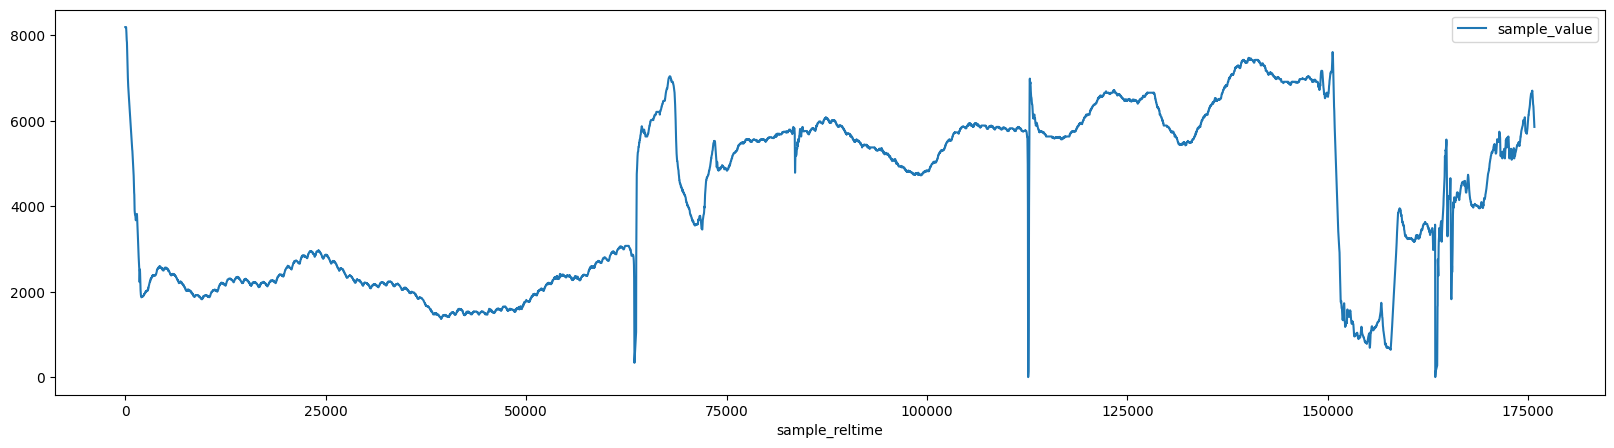

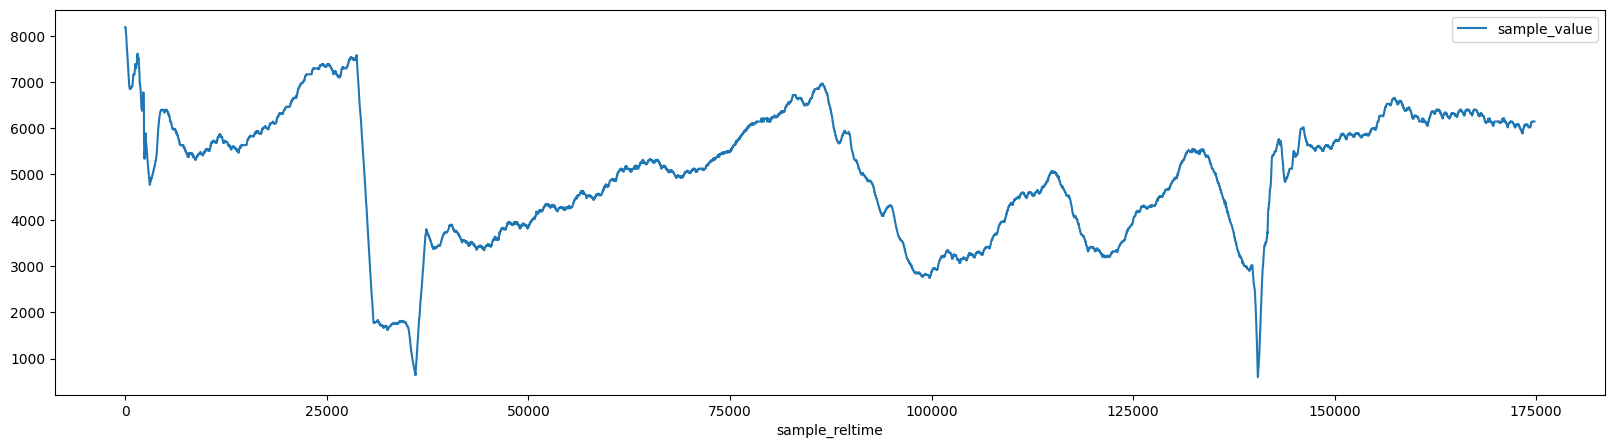

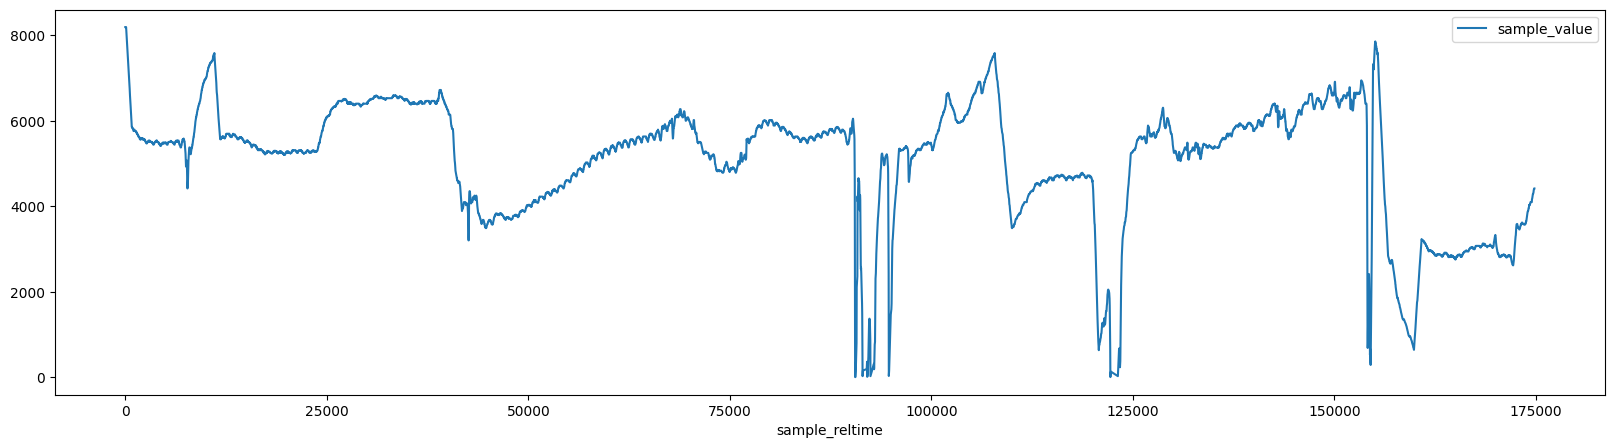

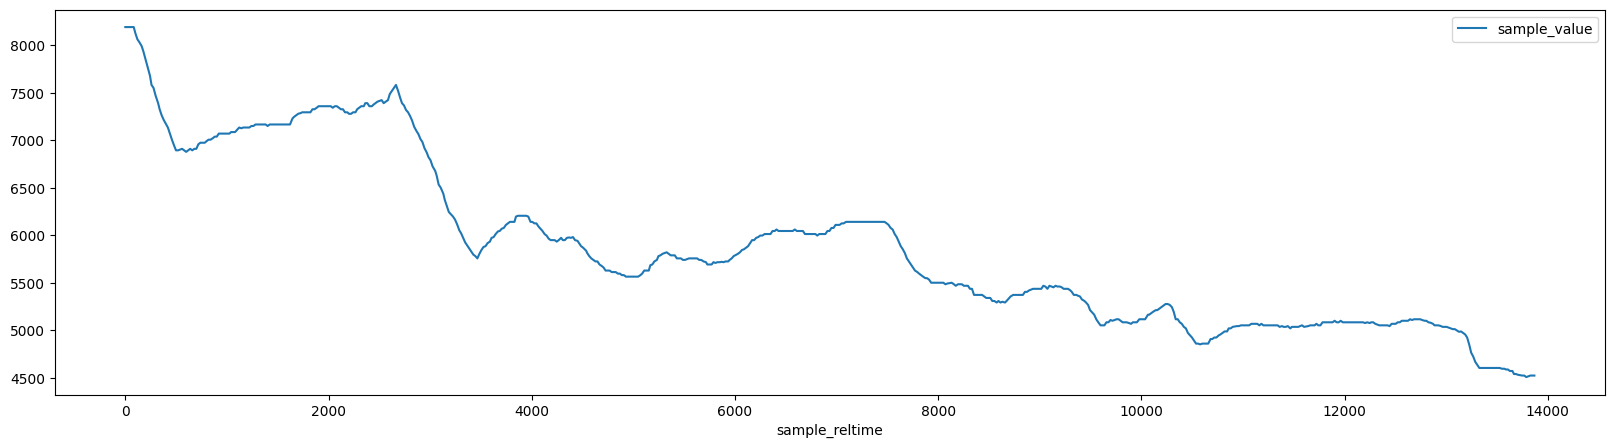

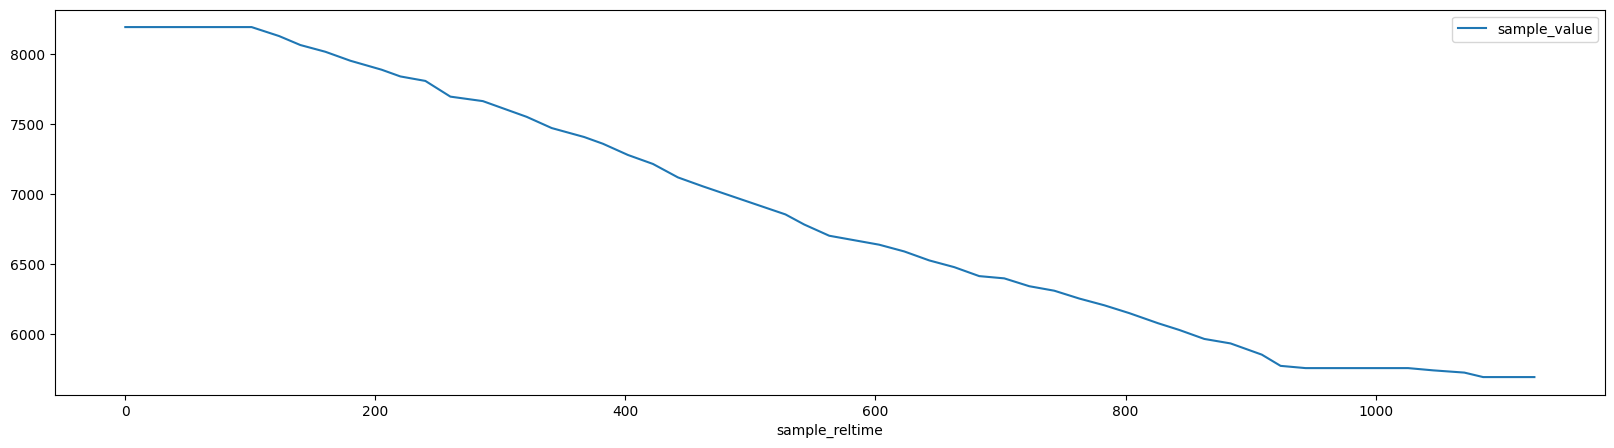

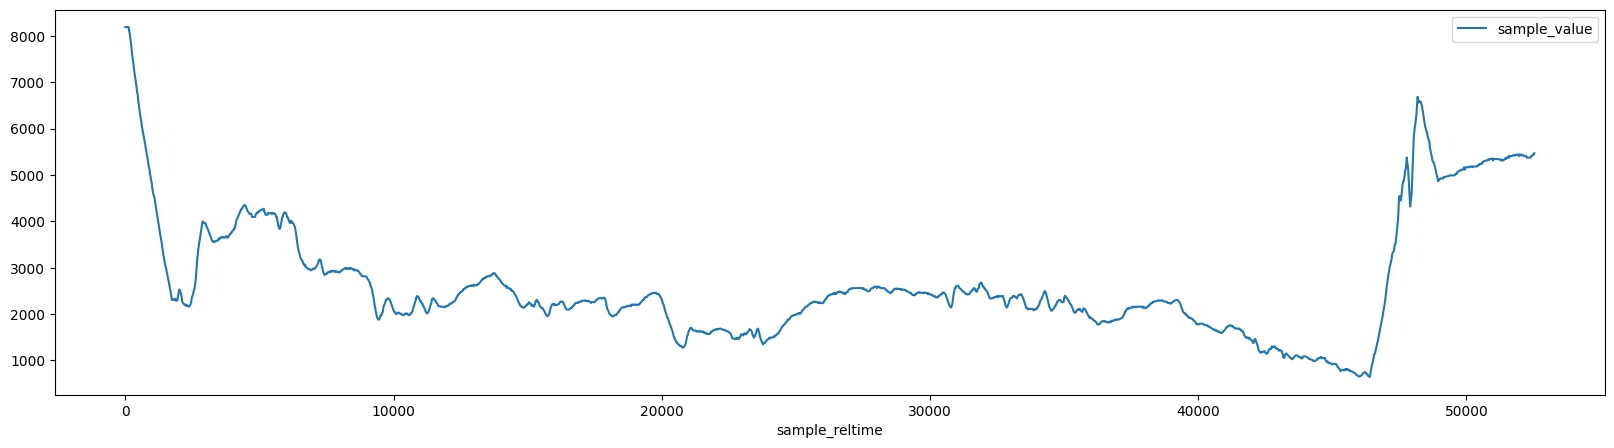

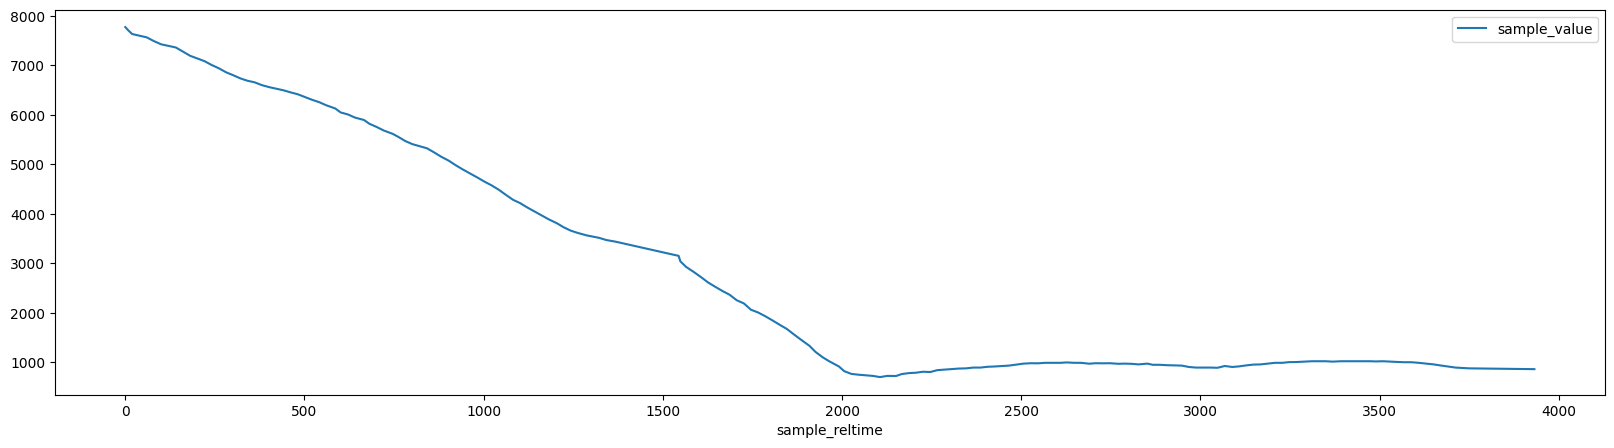

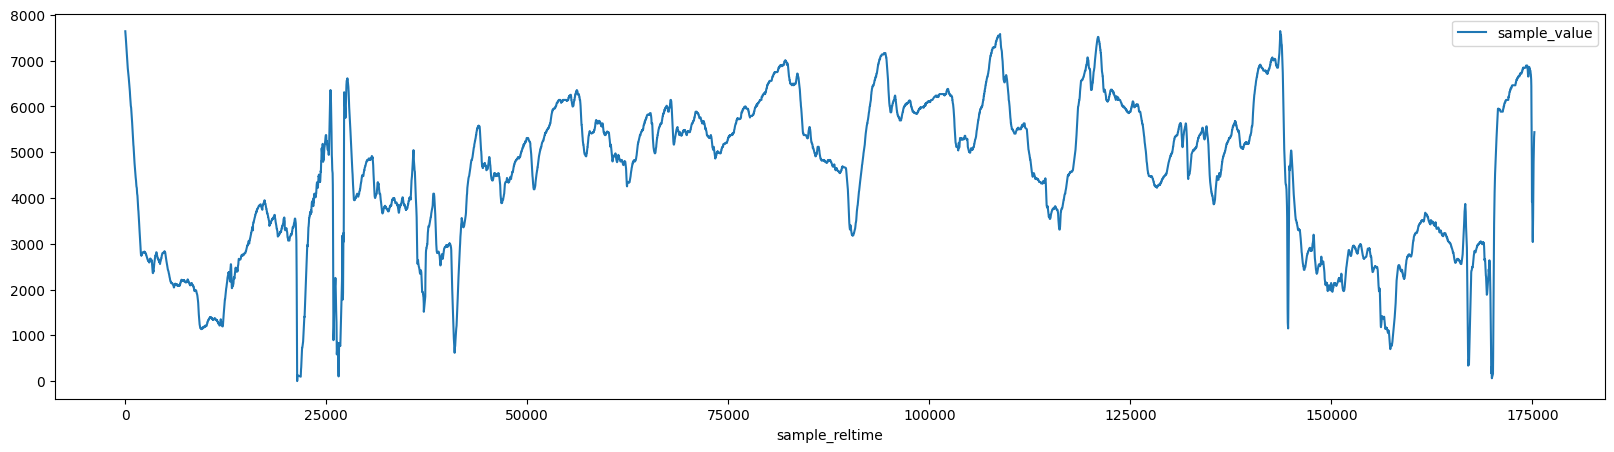

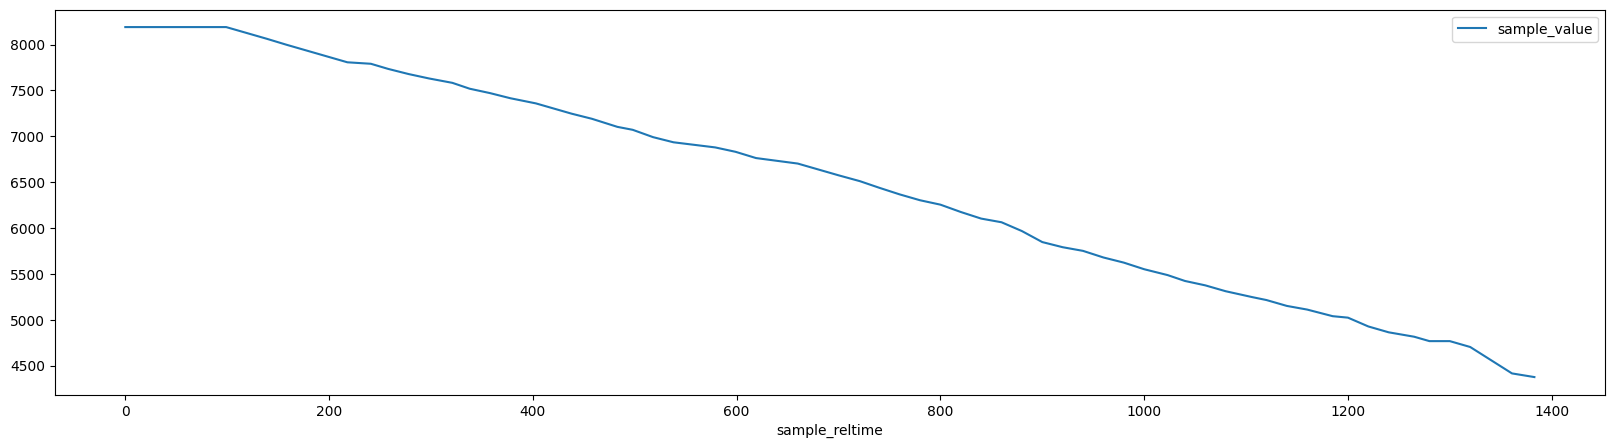

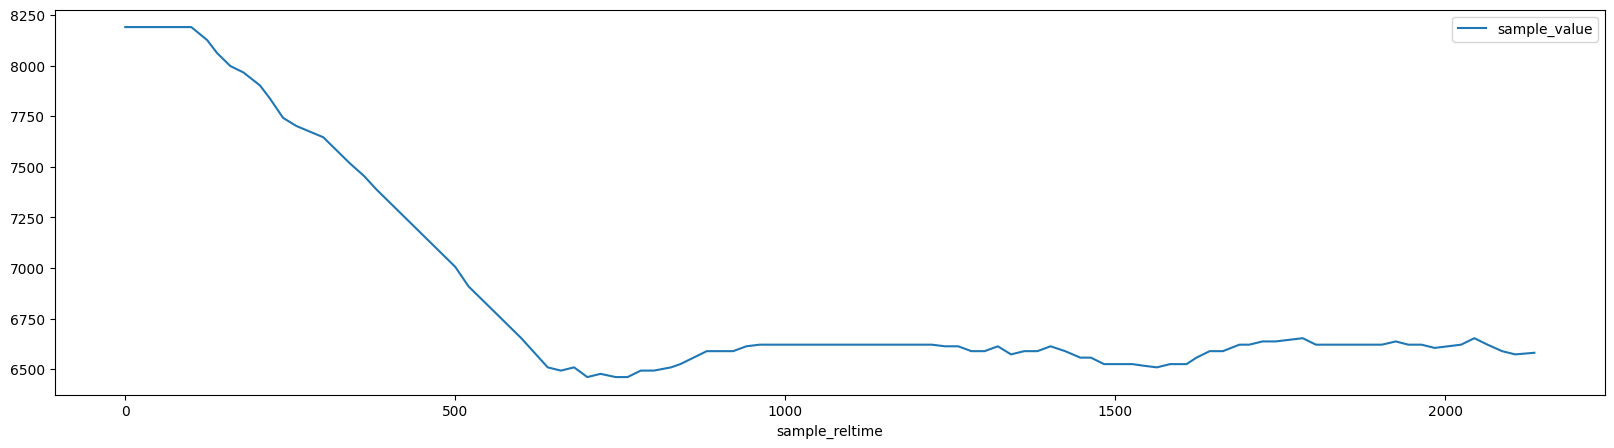

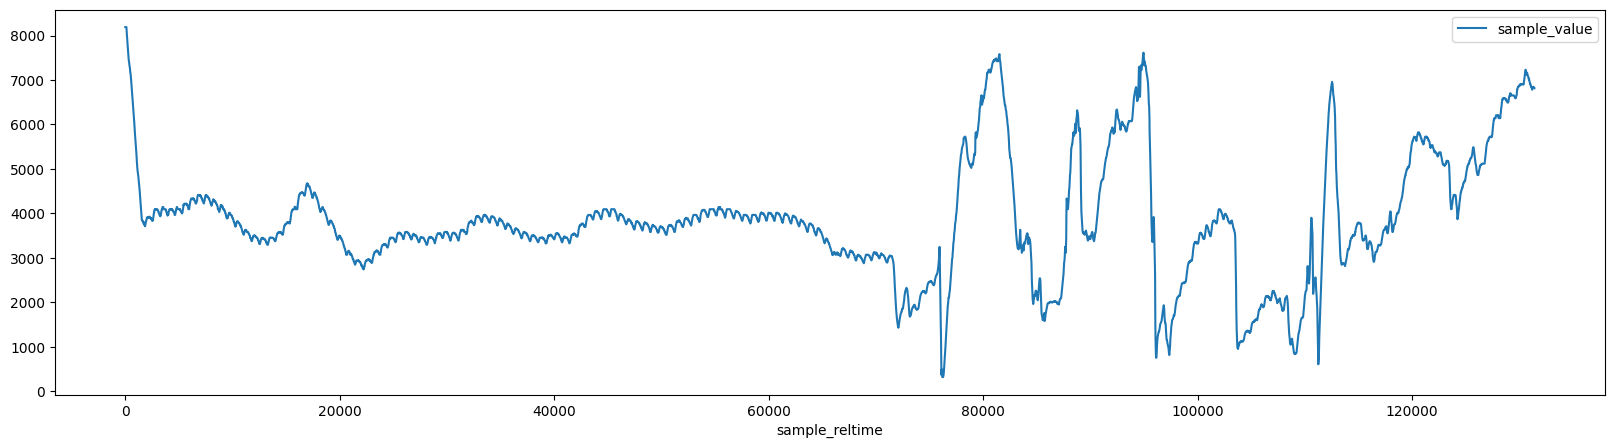

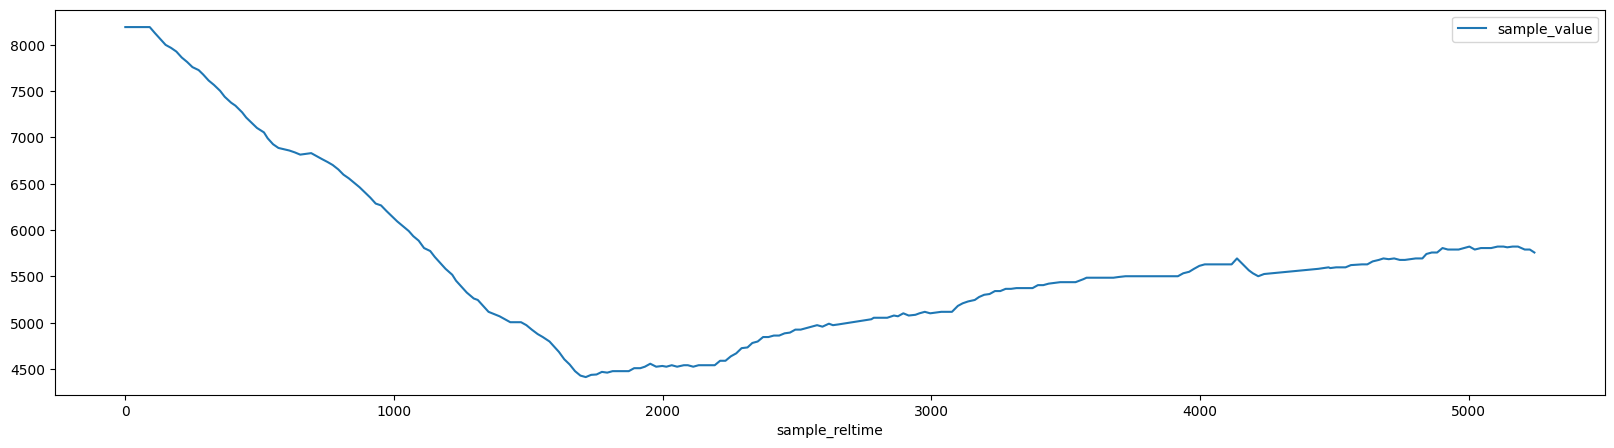

In [46]:
#this example shows how to use the bangle api to get syncs and turn them into something useful using pandas
import pandas as pd
import requests
import datetime
import base64
import struct
import json
import math
import matplotlib.pyplot as plt
import seaborn as sns
from_time = math.floor((datetime.datetime.now()-datetime.timedelta(days=1)).timestamp())
res = requests.get(f"https://bbs.ugavel.com/getsyncs?device_id=e5:cc:1d:bb:e4:d1&from_time=0&app_name=test_app")
df = pd.DataFrame.from_records(res.json()["syncs"])
app_name="test_app"
df = df["data"].str.extract(f"hrmraw{app_name}([0-9]+)_([0-9]+):(.*)\n?").dropna()
df.columns = ["version","timestamp_utc", "encoded"]
df["decoded"] = df.encoded.apply(base64.b64decode)
df["unpacked"] = df.decoded.apply(lambda x: list(struct.iter_unpack(">HB",x)))
df = df[["timestamp_utc","unpacked"]].explode("unpacked")
df["sample_delta"] = df.unpacked.apply(lambda x: x[1])
df["sample_value"] = df.unpacked.apply(lambda x: x[0])

df = df[["timestamp_utc","sample_delta","sample_value"]]
df.index.name="reading_id"
df["sample_reltime"] = df.groupby("timestamp_utc").sample_delta.cumsum()
df.to_csv("hrm_readings_kyle.csv")
df = df[df.sample_value < 20000] #this is bad data
df.groupby("timestamp_utc").plot(x="sample_reltime",y="sample_value",figsize=(20,5))
# df["acceldata"] = df.acceldata_encoded.apply(base64.b64decode)
# df["acceldata_unpacked"] = df.acceldata.apply(lambda x: list(struct.iter_unpack(">IIIIH",x)))
# df = df.explode("acceldata_unpacked")
# df['acceldata_movement'] = df.acceldata_unpacked.apply(lambda x: x[1]/x[2])
# df['accel_data_timestamp'] = df.acceldata_unpacked.apply(lambda x: x[0])
# df['dt'] = df.accel_data_timestamp.apply(datetime.datetime.fromtimestamp)
# df['date'] = df.dt.dt.date
# df['hour'] = df.dt.dt.hour
# df['minute'] = df.dt.dt.minute
# df = df[["dt", "date","hour","minute","acceldata_movement"]]
# fig,ax = plt.subplots(figsize=(20,5))
# df.plot(x="dt",y="acceldata_movement",figsize=(20,5), ax = ax)
